In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
## Missing Values
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


## Insights and observation
The dataset has msising values

In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## DATA CLEANING

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
# checking number of numeric value in review(here numeric values is in string format)
df['Reviews'].str.isnumeric().sum()

10840

In [ ]:
# checking non numerical value in review (~ = not)
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop(index=10472,inplace=True)
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df['Reviews']= df["Reviews"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# 19M = 19000k
# we are replacing 'Word' into 'Number
df['Size'] = df['Size'].str.replace('M','000')
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = df['Size'].replace('Varies with device',np.nan)
df['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [ ]:
df['Size'] = df['Size'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
chars_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']
for item in chars_to_remove:
  for col in cols_to_clean:
    df[col] = df[col].str.replace(item,'')

In [ ]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [ ]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
# converting into date time
df['Last Updated']= pd.to_datetime(df['Last Updated'])
df['Last Updated']

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20
...,...
10836,2017-07-25
10837,2018-07-06
10838,2017-01-20
10839,2015-01-19


df['Last Updated'] column was converted to a datetime object using pd.to_datetime. The `.str` accessor is designed for string manipulation and cannot be applied to datetime objects.

In [ ]:
# Extracting day, month, and year using the .dt accessor
df['Day'] = df['Last Updated'].dt.day
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [ ]:
df.drop('Last Updated',axis=1,inplace=True)
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018


In [ ]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
chars_to_remove =['and up','W','- 7.1.1','- 8.0',' - 6.0']
for item in chars_to_remove:
  df['Android Ver'] = df['Android Ver'].str.replace(item,'')
df['Android Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       'Varies with device', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ',
       '2.1 ', '7.0 ', '5.1 ', '4.3 ', '2.0 ', '3.2 ', '7.1 ', '8.0 ',
       '3.1 ', '2.0.1 ', nan, '5.0', '1.0 '], dtype=object)

In [ ]:
df['Android Ver'] = df['Android Ver'].replace('Varies with device',np.nan)
df['Android Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       nan, '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '2.0 ', '3.2 ', '7.1 ', '8.0 ', '3.1 ', '2.0.1 ',
       '5.0', '1.0 '], dtype=object)

In [ ]:
chars_to_remove =['.0.3','.0.1']
for item in chars_to_remove:
  df['Android Ver'] = df['Android Ver'].str.replace(item,'.0')
df['Android Ver'].unique()

array(['4.0 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '2.3.3 ', nan,
       '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ', '5.1 ',
       '4.3 ', '2.0 ', '3.2 ', '7.1 ', '8.0 ', '3.1 ', '5.0', '1.0 '],
      dtype=object)

In [ ]:
df['Android Ver'] = df['Android Ver'].str.replace('.3.3','.3')
df['Android Ver'].unique()

array(['4.0 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', nan, '2.2 ',
       '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ', '5.1 ', '4.3 ',
       '2.0 ', '3.2 ', '7.1 ', '8.0 ', '3.1 ', '5.0', '1.0 '],
      dtype=object)

In [ ]:
df['Android Ver']=df['Android Ver'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     9476 non-null   float64
 12  Day             10840 non-null  int32  
 13  Month           10840 non-null  int32  
 14  Year            10840 non-null  int32  
dtypes: float64(4), int32(3), int64(2), object(6)
memory usage: 1.5+ MB


In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0,7,1,2018


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     9476 non-null   float64
 12  Day             10840 non-null  int32  
 13  Month           10840 non-null  int32  
 14  Year            10840 non-null  int32  
dtypes: float64(4), int32(3), int64(2), object(6)
memory usage: 1.5+ MB


In [ ]:
df.to_csv('clean_data/clean-playstore_dataset.csv')

# EXPLORATORY DATA ANALYSIS

In [ ]:
df[df.duplicated('App')].shape

(1181, 15)

In [ ]:
df= df.drop_duplicates(subset=['App'],keep='first')
df.shape

(9659, 15)

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

## Explore Data

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] #'O', which represents "object"
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Android Ver', 'Day', 'Month', 'Year']

We have 6 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [ ]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
---------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271

# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset

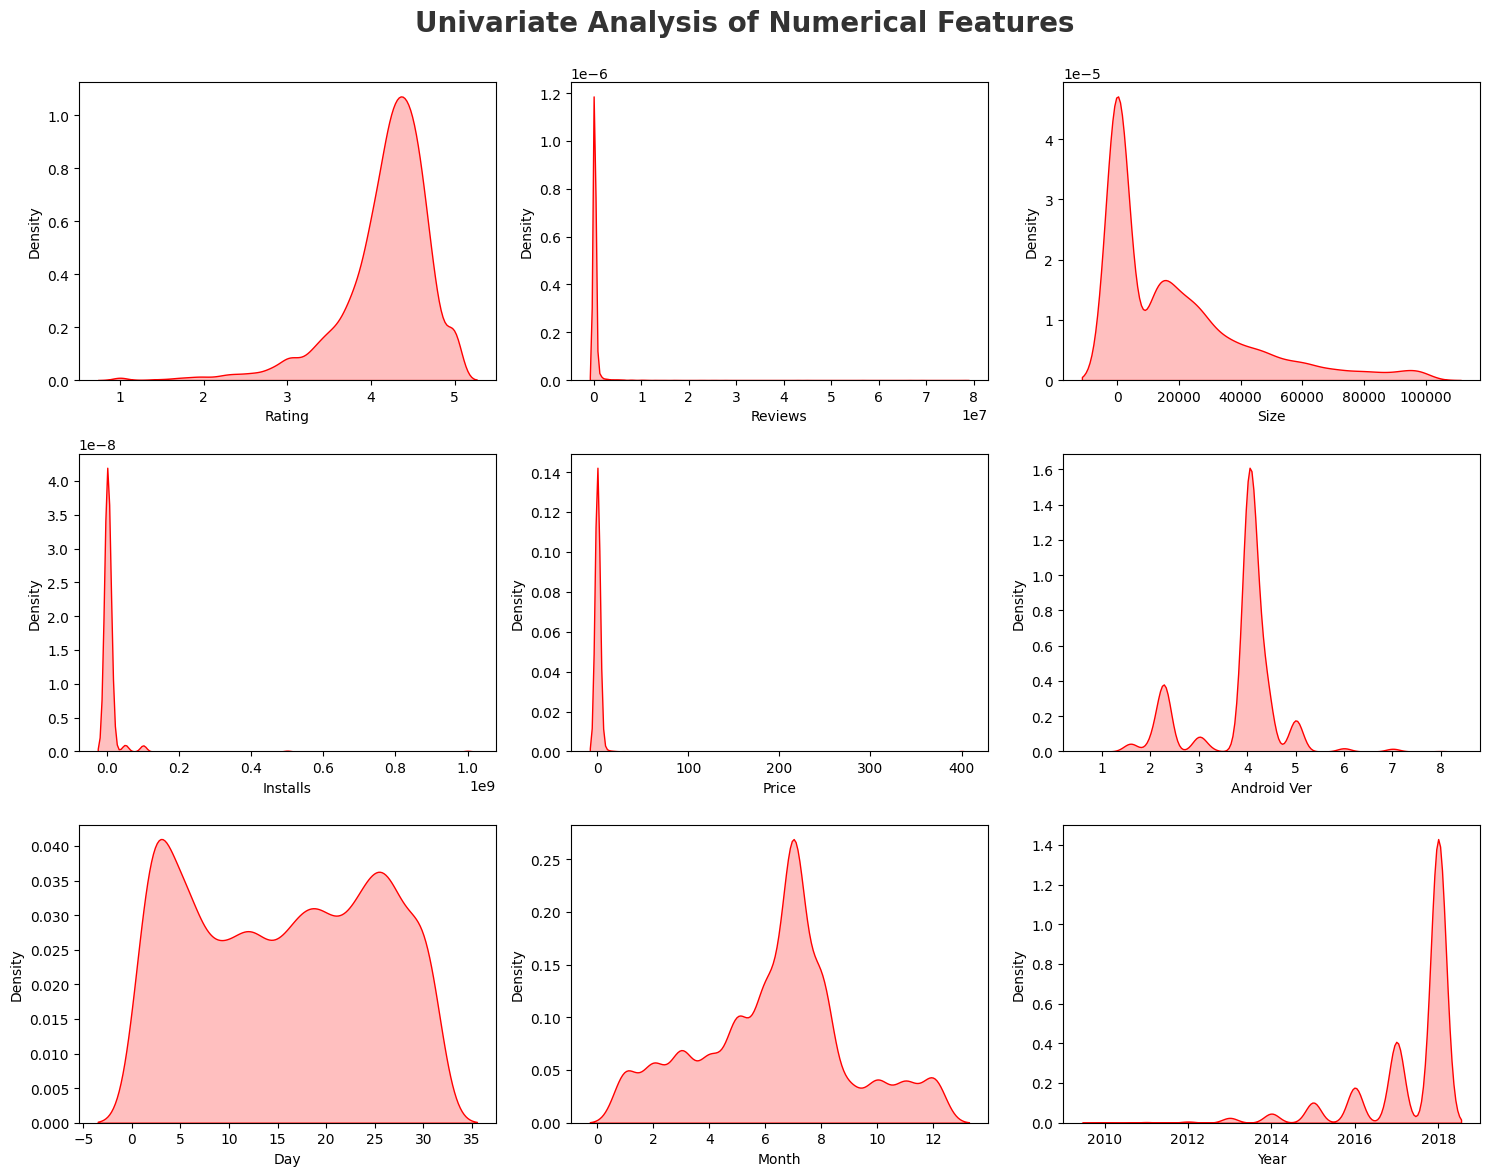

In [ ]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

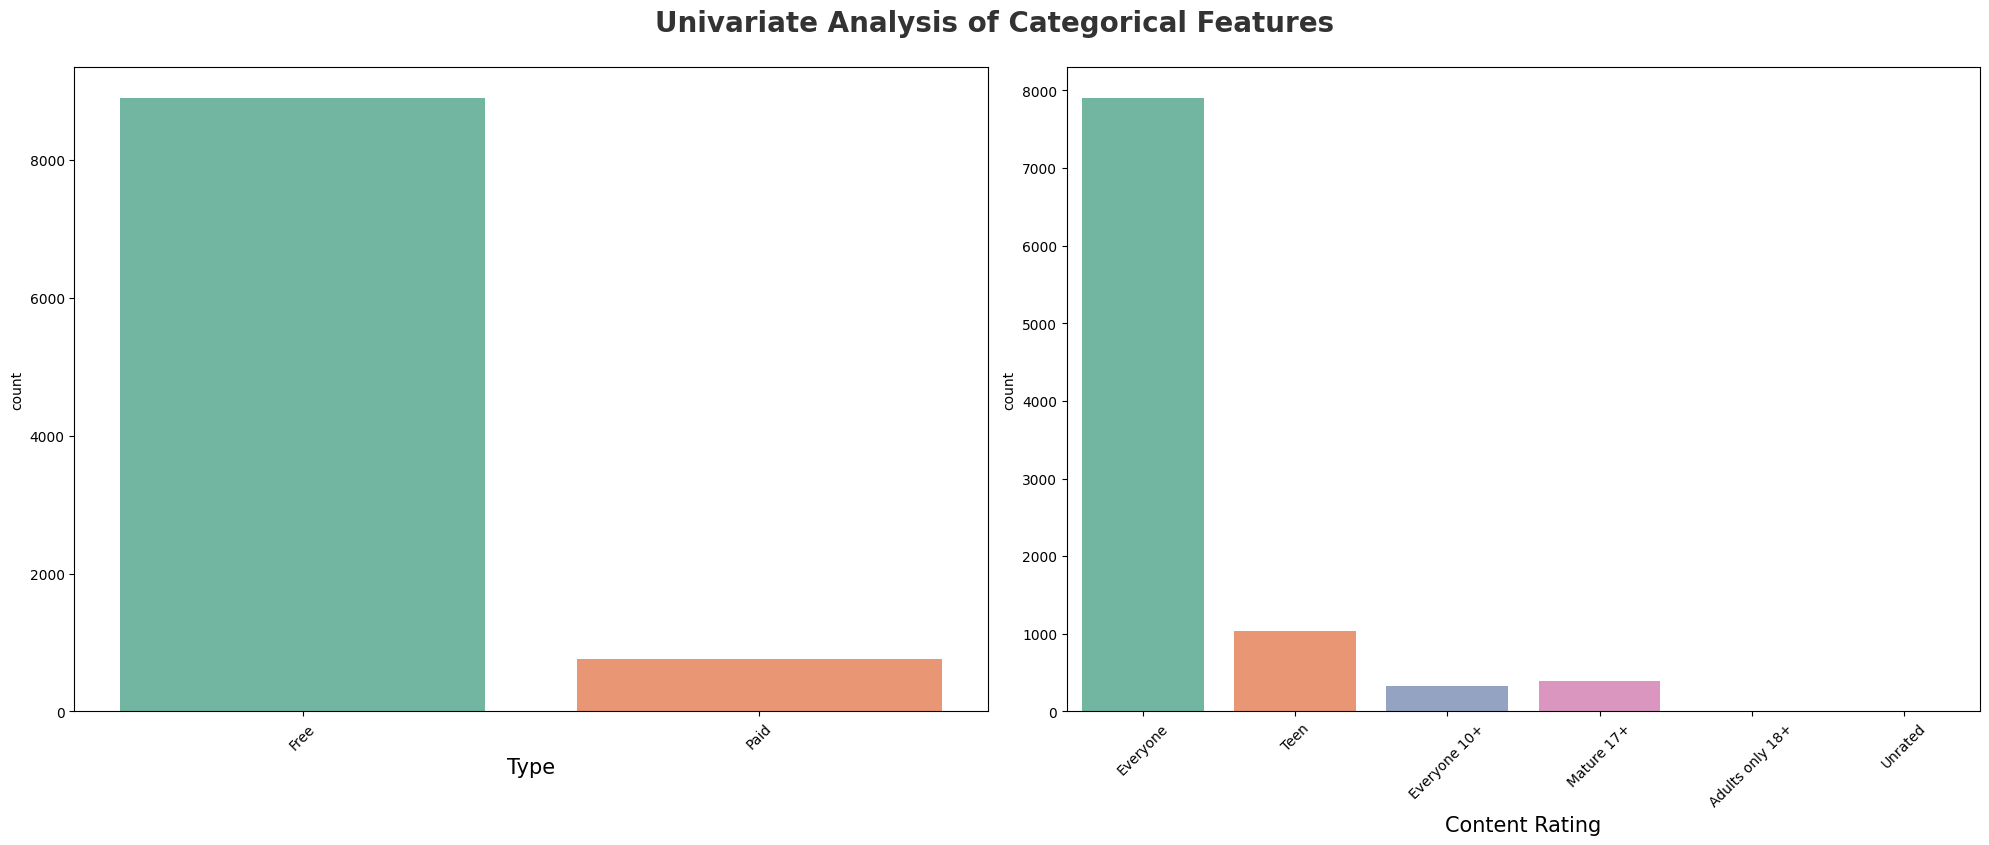

In [ ]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i],fontsize=15)
    plt.xticks(rotation=45)
    plt.tight_layout()

## Which is the most popular app category?

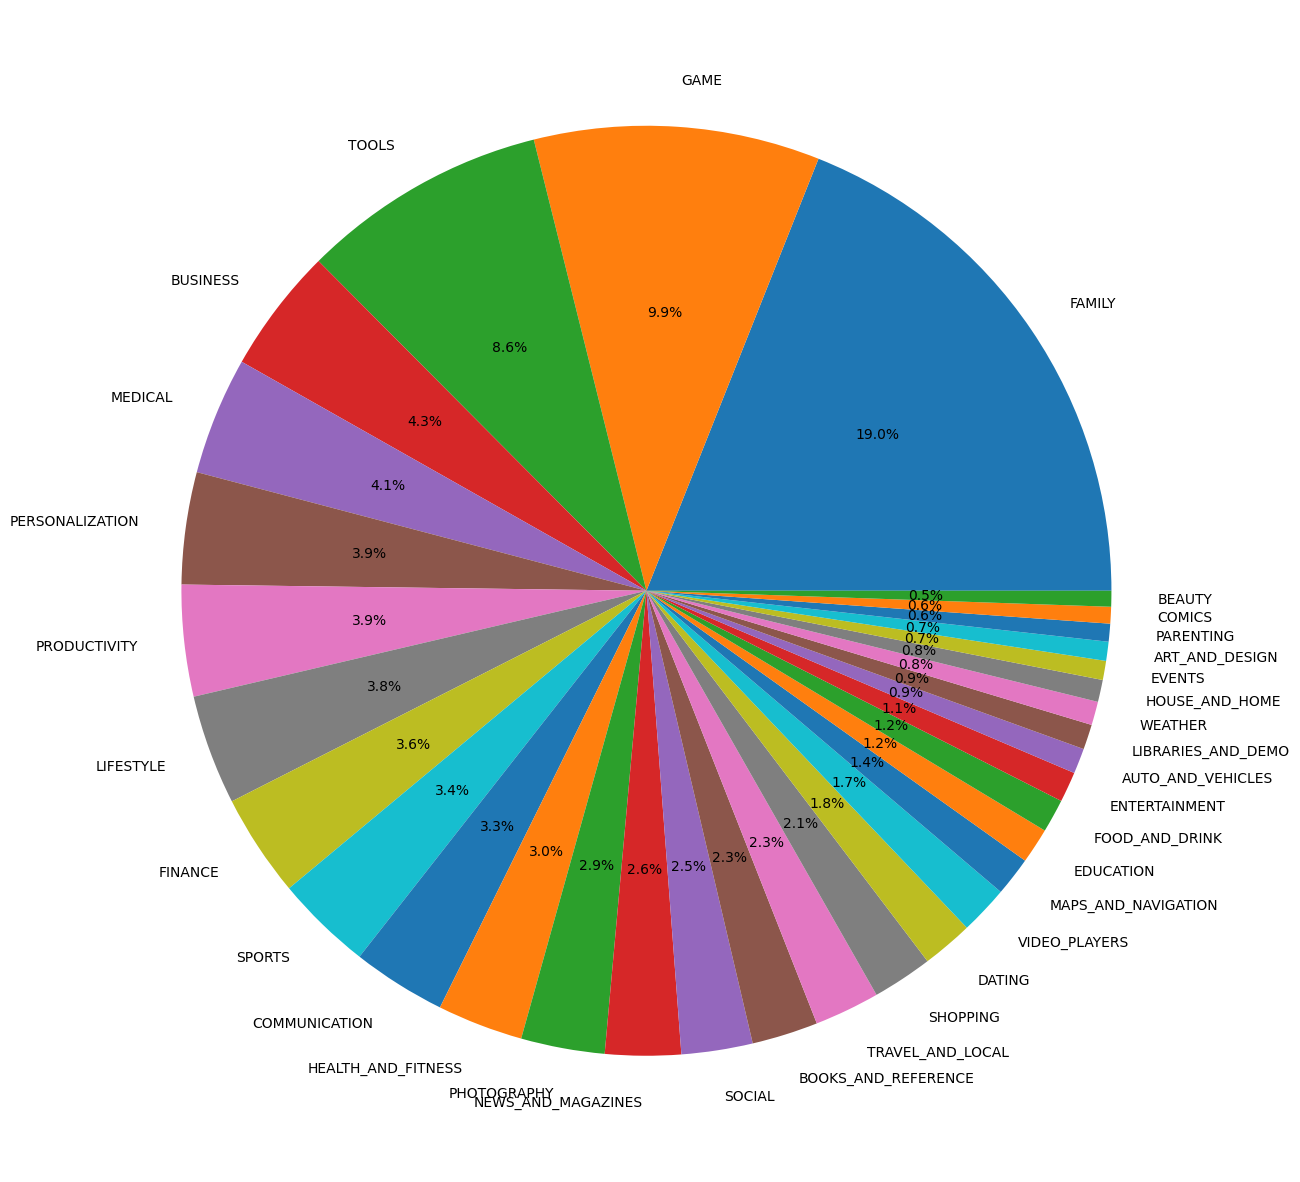

In [ ]:
fig, ax = plt.subplots(figsize=(15, 16))
ax.pie(df['Category'].value_counts(), autopct='%1.1f%%', labels=df['Category'].value_counts().index)
plt.show()2

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [ ]:
category =pd.DataFrame(df['Category'].value_counts())
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


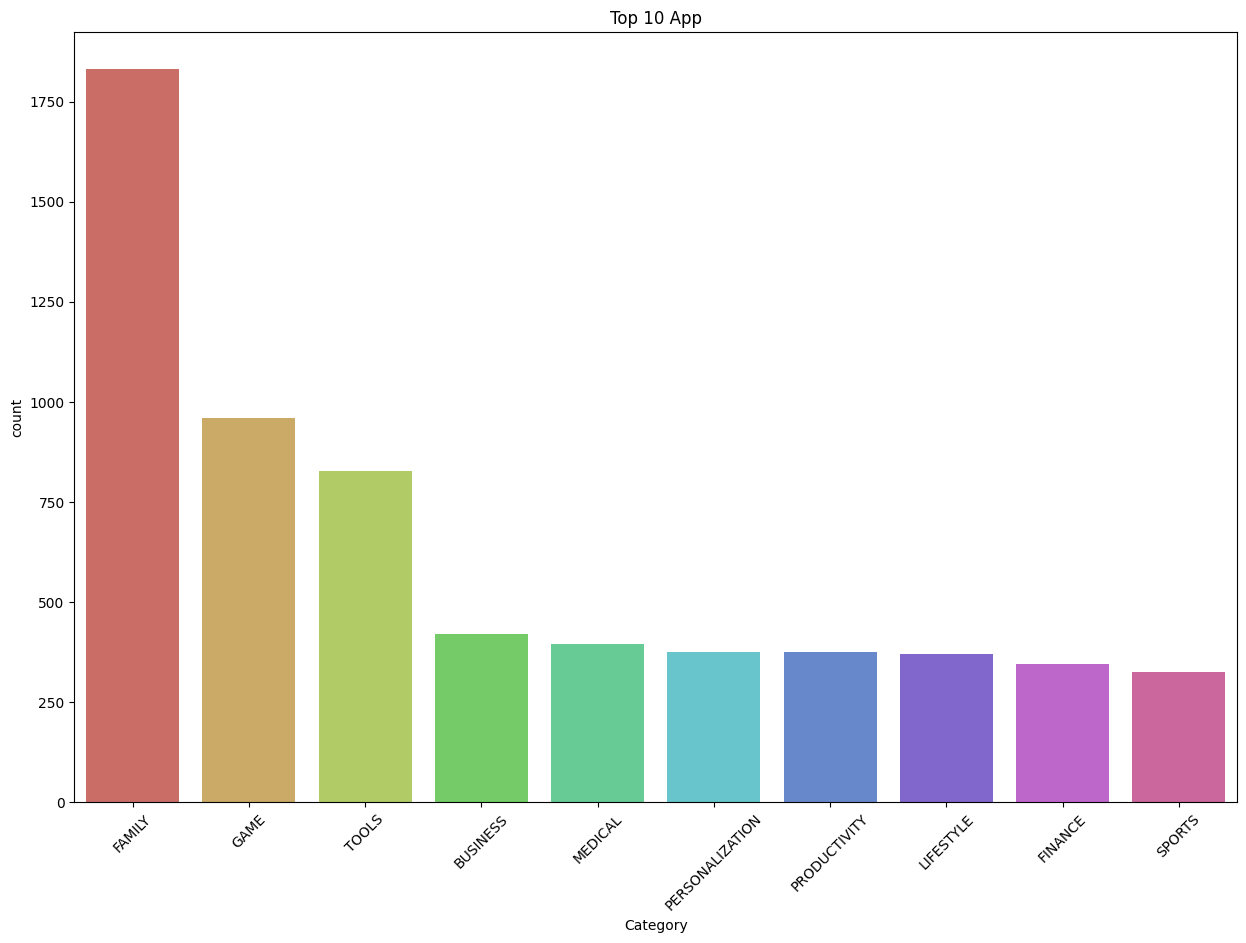

In [ ]:
# Top 10 App
plt.figure(figsize=(15,10))
sns.barplot(x=category.index[:10],y='count',data=category[:10],palette='hls')
plt.xticks(rotation=45)
plt.title('Top 10 App')
plt.show()

## How many apps are there on Google Play Store which get 5 ratings??

In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0,15,1,2018


In [ ]:
rating = pd.DataFrame(df.Rating.value_counts()).reset_index()
print(rating)

print('\ntotal number of 5star app: ')
for i in range(len(rating)):
   n = rating.loc[i,'Rating']
   if n==5:
    print(rating.loc[i, 'count'])

    Rating  count
0      4.3    897
1      4.4    895
2      4.5    848
3      4.2    810
4      4.6    683
5      4.1    621
6      4.0    513
7      4.7    442
8      3.9    359
9      3.8    286
10     5.0    271
11     3.7    224
12     4.8    221
13     3.6    167
14     3.5    156
15     3.4    126
16     3.3    100
17     4.9     85
18     3.0     81
19     3.1     69
20     3.2     63
21     2.9     45
22     2.8     40
23     2.6     24
24     2.7     23
25     2.5     20
26     2.3     20
27     2.4     19
28     1.0     16
29     2.2     14
30     2.0     12
31     1.9     11
32     1.7      8
33     1.8      8
34     2.1      8
35     1.6      4
36     1.4      3
37     1.5      3
38     1.2      1

total number of 5star app: 
271


In [ ]:
# Filter for rating value 5
five_star_rating = rating[rating['Rating'] == 5]
# plot barplot for 5 star rating and its count
five_star_rating

,Rating,count
10,5.0,271


## Which Category has largest number of installations??

In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0,15,1,2018


In [ ]:
df_installation = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_installation['Installs'] = df_installation['Installs']/1000000000 #billion
df_installation
df2 = df_installation.head(10)
df2

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


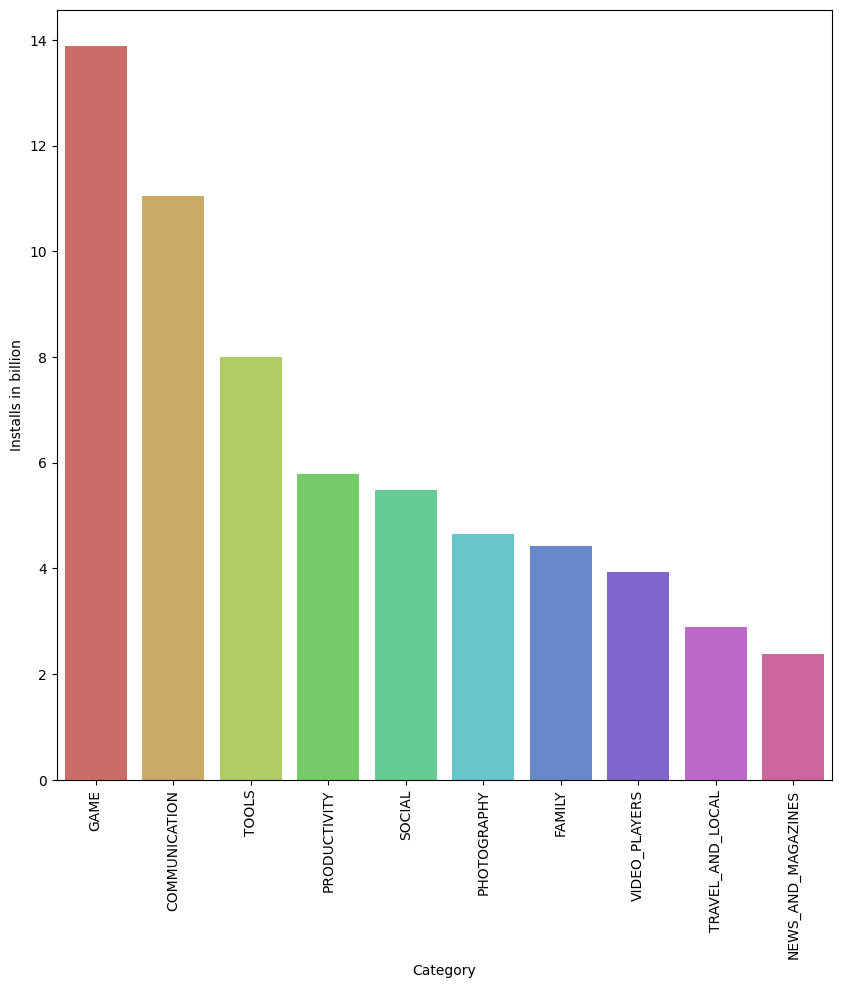

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Category',y='Installs',data=df2,palette='hls')
plt.xlabel('Category')
plt.ylabel('Installs in billion')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Values': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Group by 'Category' and compute the sum of each group
grouped = df.groupby('Category')['Values'].sum()
grouped
# Output:
# Category
# A     90
# B     60


,Values
Category,
A,90
B,60


In [ ]:
data = {'Category': ['A', 'A', 'B', 'B'],
        'Sub-Category': ['X', 'Y', 'X', 'Y'],
        'Values': [10, 20, 30, 40]}
df = pd.DataFrame(data)

# Group by 'Category' and 'Sub-Category'
grouped = df.groupby(['Category', 'Sub-Category'])['Values'].sum()
print(grouped)
# Output:
# Category  Sub-Category
# A         X              10
#           Y              20
# B         X              30
#           Y              40


Category  Sub-Category
A         X               10
          Y               20
B         X               30
          Y               40
Name: Values, dtype: int64
